In [20]:
%pylab inline
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

Populating the interactive namespace from numpy and matplotlib


In [3]:
def describeData(data, names):
    description =  pd.DataFrame([[name, min(col), max(col), mean(col), std(col)] for name, col in zip(names, data.T)])
    description.columns = ["Name", "Min","Max", "Mean", "Std"]
    print description.head(len(names))
    
def normalize(data):
    return (data - data.min(0))/ (data.max(0) - data.min(0))

In [4]:
server_data = pd.read_csv('data2.gz', sep=';', header = None)
server_data.columns = ['date', 'month', 'day', 'dayofweek', 'hour', 'method', 'content', 'protocol', 'domain', 'code', 'size', 'target']
server_data['protocol'] = pd.Categorical.from_array(server_data['protocol']).codes
server_data['method'] = pd.Categorical.from_array(server_data['method']).codes

In [5]:
server_data.head(10)

,date,month,day,dayofweek,hour,method,content,protocol,domain,code,size,target
0,815854245,11,8,3,69045,0,/~macphed/finite/fe_resources/node16.html,-1,mffry.mines.edu,200,1413,2
1,815743836,11,7,2,45036,0,/dcs/courses/cai/html/introduction_lesson/desc...,6,enghouse.com,200,1520,2
2,812296001,9,28,4,53201,0,/mlookup/white.html,6,mac13.ee.umn.edu,200,511,2
3,812531958,10,1,0,29958,0,/~scottp/publish.html,-1,ix-bos6-07.ix.netcom.com,200,271,2
4,817730723,11,30,4,44723,0,/~scottp/index.html,-1,www.gnofn.org,200,1990,2
5,820322820,12,30,6,44820,0,/~macpherc/images/tspbadge.gif,-1,dd59-006.compuserve.com,200,3282,2
6,812575818,10,1,0,73818,0,/search/index.html,6,alf.usask.ca,200,1673,2
7,813597593,10,13,5,58793,0,/wcvm/picture.gif,6,wcvm7661.usask.ca,200,1295,2
8,818321925,12,7,4,31125,0,/~ladd/lsu.html,-1,prism.lib.auburn.edu,200,1093,2
9,816535726,11,16,4,59326,0,/~zhaok/image/icon/uslogo32.gif,-1,geolab10.usask.ca,200,1640,2


In [6]:
used_columns = ['date', 'month', 'day', 'dayofweek', 'hour', 'code', 'size']

data = server_data[used_columns]
data['size'][data['size'] == '-'] = '0'
data['size'] =data['size'].astype('int32')

data_perm = random.permutation(data)
data_norm = normalize(data_perm)
data_scale = preprocessing.scale(data_perm, axis=0)

describeData(data_perm, used_columns)
describeData(data_norm, used_columns)
describeData(data_scale, used_columns)

/home/kazik/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/kazik/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:4059: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/kazik/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:3066: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/kazik/anaconda2/lib/pyth

        Name        Min        Max          Mean             Std
0       date  783002501  820450768  8.064732e+08  7782983.904996
1      month          1         12  7.668394e+00        2.589191
2        day          1         31  1.561622e+01        8.681577
3  dayofweek          0          6  2.988482e+00        1.791178
4       hour          0      86399  4.856911e+04    20802.229278
5       code        200        501  2.159664e+02       42.145028
6       size          0   30193824  1.175115e+04    82129.758792
        Name  Min  Max      Mean       Std
0       date    0    1  0.626751  0.207833
1      month    0    1  0.606218  0.235381
2        day    0    1  0.487207  0.289386
3  dayofweek    0    1  0.498080  0.298530
4       hour    0    1  0.562149  0.240769
5       code    0    1  0.053045  0.140017
6       size    0    1  0.000389  0.002720
        Name       Min         Max          Mean  Std
0       date -3.015648    1.795908 -1.014913e-17    1
1      month -2.575474    1.

NORMALIZED PCA


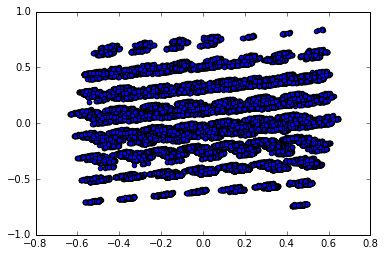

Standarized PCA


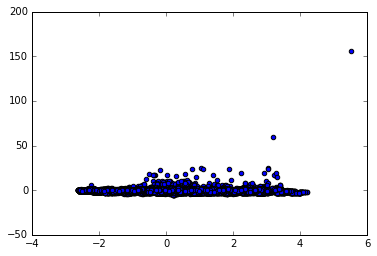

In [7]:
data_norm_pca = decomposition.PCA(n_components=2).fit_transform(data_norm)
data_scale_pca = decomposition.PCA(n_components=2).fit_transform(data_scale)
print "NORMALIZED PCA"
plt.scatter(data_norm_pca[:100000,0], data_norm_pca[:100000, 1])
show()
print "Standarized PCA"
plt.scatter(data_scale_pca[:100000,0], data_scale_pca[:100000, 1])
show()

NORMALIZED TSNE


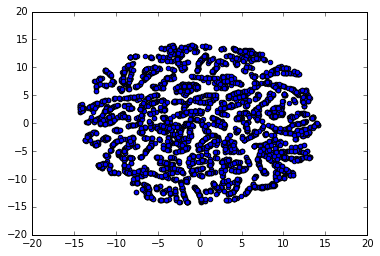

Standarized TSNE


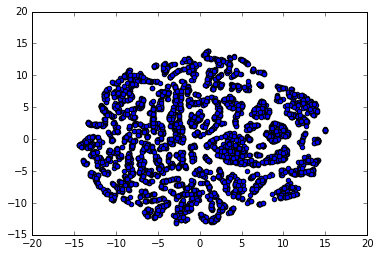

In [117]:
# Musialem zmniejszyc liczbe danych dla tsne bo nie byl wstanie tego przetworzyc. 
# Wybieram 10000 pierwszysch bo i tak zostaly wczesniej przepermutowane

norm_tsne = data_norm[:5000]
scale_tsne = data_scale[:5000]

data_norm_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(norm_tsne)
data_scale_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(scale_tsne)
print "NORMALIZED TSNE"
plt.scatter(data_norm_tsne[:,0], data_norm_tsne[:, 1])
show()
print "Standarized TSNE"
plt.scatter(data_scale_tsne[:,0], data_scale_tsne[:, 1])
show()


In [42]:
km = KMeans().fit(data_norm[:10000])

labels = km.labels_

[[  5.00000000e-01   0.00000000e+00   1.00000000e+00   1.00000000e+00]
 [  2.17647059e-01   4.29120609e-01   9.75511968e-01   1.00000000e+00]
 [  7.25490196e-02   7.82927610e-01   9.00586702e-01   1.00000000e+00]
 [  3.54901961e-01   9.74138602e-01   7.82927610e-01   1.00000000e+00]
 [  6.45098039e-01   9.74138602e-01   6.22112817e-01   1.00000000e+00]
 [  9.27450980e-01   7.82927610e-01   4.34676422e-01   1.00000000e+00]
 [  1.00000000e+00   4.29120609e-01   2.19946358e-01   1.00000000e+00]
 [  1.00000000e+00   1.22464680e-16   6.12323400e-17   1.00000000e+00]]


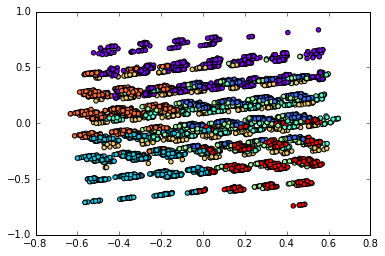

In [45]:
colors = cm.rainbow(np.linspace(0, 1, len(unique(labels))))
print colors
plt.scatter(data_norm_pca[:10000, 0], data_norm_pca[:10000, 1], c= colors[labels])